## 생육 정보 EDA

### 필요한 라이브러리 불러오기

In [1]:
# 표준 라이브러리
import sys
from pathlib import Path
from itertools import combinations

# 서드파티 라이브러리
import pandas as pd
import missingno as msno

# 로컬 모듈
sys.path.append(str(Path.cwd().parent))
from utils import DATA_DIR, growth_map

In [2]:
import platform
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

mpl.rcParams['axes.unicode_minus'] = False

# 폰트 개인 경로에 맞춰서 변경
# FONT_DIR = Path("/path/to/fonts")
# font_path = FONT_DIR / 'FREESENTATION-6SEMIBOLD.ttf'
# prop = fm.FontProperties(fname=font_path)

### 생육정보 원본 데이터 불러오기

In [3]:
pandas_kwargs = {
    'memory_map': True,
    'encoding': 'cp949',
    'parse_dates': ['measDate'],
    'date_format': '%Y-%m-%d'
}

growth_data = pd.read_csv(DATA_DIR / 'raw' / '22_생육정보.csv', **pandas_kwargs)
growth_data

,measDate,farm_cde,itemCode,flowerTop,grwtLt,lefCunt,lefLt,lefBt,stemThck,flanGrupp,frtstGrupp,hvstGrupp,frtstCo
0,2022-09-26,천지인술,80300.00,NaN,20.00,NaN,NaN,NaN,8.539,NaN,NaN,NaN,NaN
1,2022-10-04,천지인술,80300.00,21.92,28.32,8.500,38.35,26.330,9.600,0.540,0.02,0.00,0.1
2,2022-10-10,천지인술,80300.00,24.51,21.71,10.500,40.18,29.040,9.992,1.320,0.82,0.00,4.3
3,2022-10-17,천지인술,80300.00,20.02,26.40,13.200,42.72,38.450,12.529,2.280,1.72,0.00,7.1
4,2022-10-24,천지인술,80300.00,33.93,26.17,13.900,45.76,43.020,10.842,2.960,2.46,0.00,9.5
5,2022-10-31,천지인술,80300.00,23.01,19.19,13.700,41.69,37.220,9.175,3.960,3.36,0.00,12.2
6,2022-11-07,천지인술,80300.00,17.14,18.28,14.400,37.19,34.480,9.019,4.460,3.98,0.00,14.7
7,2022-11-14,천지인술,80300.00,15.78,9.04,14.000,38.04,30.360,6.585,5.200,4.64,0.00,17.9
8,2022-11-21,천지인술,80300.00,22.99,14.75,15.800,39.91,39.010,7.371,5.340,5.08,0.02,20.1
9,2022-11-28,천지인술,80300.00,38.93,19.61,14.100,40.48,42.080,8.802,5.360,5.24,0.08,19.8


In [4]:
# 생육정보 데이터 크기
display(growth_data.shape)

# 생육정보 컬럼들
display(growth_data.columns)

(48, 13)

Index(['measDate', 'farm_cde', 'itemCode', 'flowerTop', 'grwtLt', 'lefCunt',
       'lefLt', 'lefBt', 'stemThck', 'flanGrupp', 'frtstGrupp', 'hvstGrupp',
       'frtstCo'],
      dtype='object')

### 생육정보 결측치 탐색

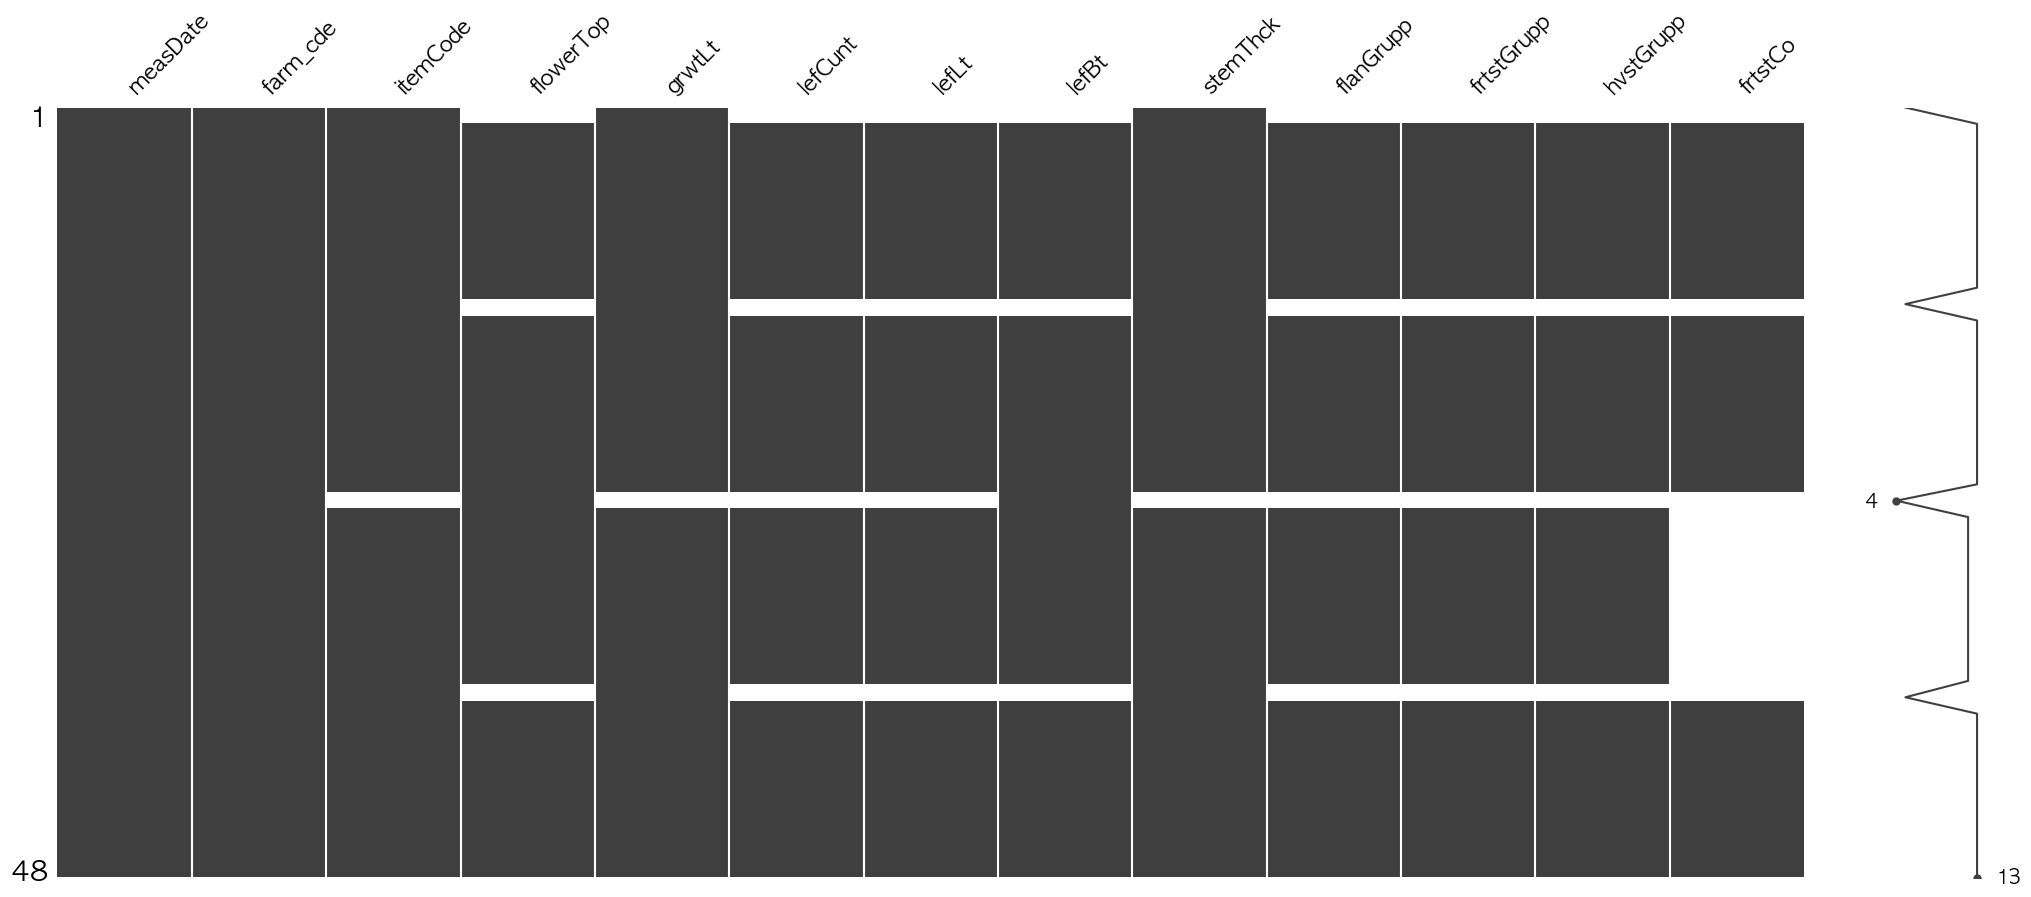

In [5]:
msno.matrix(growth_data)
plt.show()

In [6]:
growth_data.isnull().sum()

measDate       0
farm_cde       0
itemCode       1
flowerTop      3
grwtLt         1
lefCunt        4
lefLt          4
lefBt          3
stemThck       1
flanGrupp      4
frtstGrupp     4
hvstGrupp      4
frtstCo       15
dtype: int64

### 생육정보 PK 탐색

In [ ]:
# 생육정보 중복 정보 
display(growth_data.duplicated().value_counts())

False    48
Name: count, dtype: int64

In [8]:
# 단일 PK 탐색
growth_data.nunique()

measDate      12
farm_cde       4
itemCode      12
flowerTop     44
grwtLt        45
lefCunt       40
lefLt         44
lefBt         45
stemThck      47
flanGrupp     44
frtstGrupp    36
hvstGrupp     22
frtstCo       29
dtype: int64

In [14]:
# 이중 PK 탐색 (정의서에 필수라고 적힌 세 가지 column 기준)
columns = ['measDate', 'farm_cde', 'itemCode']

for cols in combinations(columns, 2):
    print('='*50)
    print(f'{"와 ".join([growth_map[col] for col in cols])}의 PK 검사')
    print('='*50)
    display(growth_data.duplicated(subset=cols).value_counts())

측정일와 온실번호의 PK 검사


False    48
Name: count, dtype: int64

측정일와 품목코드의 PK 검사


False    24
True     24
Name: count, dtype: int64

온실번호와 품목코드의 PK 검사


True     33
False    15
Name: count, dtype: int64

In [12]:
growth_data['itemCode'].value_counts()

itemCode
80300.00    36
23.79        1
20.03        1
17.91        1
23.20        1
19.44        1
12.35        1
28.15        1
16.08        1
20.65        1
24.69        1
29.49        1
Name: count, dtype: int64